In [24]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [25]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


train_path = 'D:/CatractImagesMobileNet/cataract/GlaucomaDataset/Training-dataset/'
valid_path = 'D:/CatractImagesMobileNet/cataract/GlaucomaDataset/Test-Dataset/'

# add preprocessing layer to the front of VGG
mbnt = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [26]:
import xlsxwriter
workbook = xlsxwriter.Workbook('D:/CatractImagesMobileNet/cataract/files/MobileNetCatractImagesAnalysis.xlsx')
worksheet1 = workbook.add_worksheet()
row=0
col=0
imageCount=0
worksheet1.write(row, 0, str("Analysis of Image"))
worksheet1.write(row, 1, str("Actual Object"))
worksheet1.write(row, 2, str("Percentage for Detected Object"))
worksheet1.write(row, 3, str("Detected Object"))
import os

row=1
for path, currentDirectory, files in os.walk("D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset"):
    for file in files:
        print(os.path.join(path, file))
        imageCount=imageCount + 1
        worksheet1.write(row, 0, str("Image-" + str(imageCount)))
        row=row+1
        

D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_061.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_062.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_063.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_064.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_065.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_066.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_067.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_068.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_069.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_070.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_071.png
D:\Catract

In [27]:
imageCount

40

In [28]:
# don't train existing weights
for layer in mbnt.layers:
    layer.trainable = False

In [29]:
  # useful for getting number of classes
folders = glob('D:/CatractImagesMobileNet/cataract/GlaucomaDataset/Training-dataset/*')
print(len(folders))

2


In [30]:
# our layers - you can add more if you want
x = Flatten()(mbnt.output)
x = Dense(200, activation='relu')(x)
x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
#prediction = Dense(1, activation='sigmoid')(x)


In [31]:
# create a model object
model = Model(inputs=mbnt.input, outputs=prediction)

In [32]:
# view the structure of the model
model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [33]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [34]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
  
training_set = train_datagen.flow_from_directory('D:/CatractImagesMobileNet/cataract/GlaucomaDataset/Training-dataset/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:/CatractImagesMobileNet/cataract/GlaucomaDataset/Test-Dataset/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 80 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [35]:
import os
cats=[]
cat=[]
for path, currentDirectory, files in os.walk("D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Training-dataset"):
    for file in files:
        #print(os.path.join(path, file))
        #print(file)
        cats=path.split("\\")
        cats=cats[len(cats)-1]
        if cats not in cat:
            cat.append(cats)
            print(cats)
cat.sort()
print(cat)

#images,cls = next(test_set)



glaucoma
normal
['glaucoma', 'normal']


In [36]:
#plt.imshow(images[3])
#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()

In [37]:
len(test_set)

2

In [38]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
3/3 [==============================] - 17s 6s/step - loss: 24.8237 - accuracy: 0.4750 - val_loss: 5.2408 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 12s 4s/step - loss: 5.3959 - accuracy: 0.4750 - val_loss: 2.6112 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 13s 4s/step - loss: 3.0628 - accuracy: 0.5125 - val_loss: 1.5136 - val_accuracy: 0.5750
Epoch 4/20
3/3 [==============================] - 13s 4s/step - loss: 1.2151 - accuracy: 0.7625 - val_loss: 1.4228 - val_accuracy: 0.6500
Epoch 5/20
3/3 [==============================] - 10s 3s/step - loss: 1.3114 - accuracy: 0.7500 - val_loss: 2.0964 - val_accuracy: 0.6250
Epoch 6/20
3/3 [==============================] - 11s 4s/step - loss: 0.7338 - accuracy: 0.8625 - val_loss: 3.5265 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 10s 3s/step - loss: 1.7874 - accuracy: 0.7000 - val_loss: 2.0959 - val_accuracy: 0.5750
Epoch 8/20
3/3 [=================

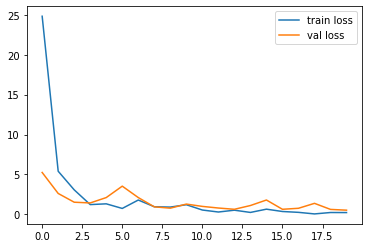

In [39]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

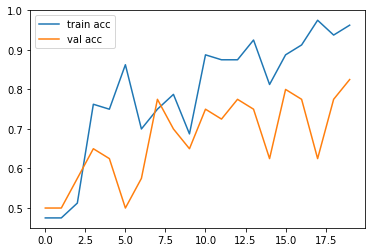

In [40]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [59]:
a, acc = model.evaluate(test_set)
print(acc)
print(a)

2/2 [==============================] - 1s 364ms/step - loss: 1.8545 - accuracy: 0.5750
0.574999988079071
1.8544601202011108


In [ ]:
model.save("D:/CatractImagesMobileNet/cataract/Mobile114Model.h4")

In [41]:
test_set = test_datagen.flow_from_directory("D:\CatractImagesMobileNet\cataract\GlaucomaDataset\\Test-Dataset",
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)
     

Found 40 images belonging to 2 classes.
[[9.2175305e-01 7.8246929e-02]
 [9.9991500e-01 8.5048421e-05]
 [2.0411807e-04 9.9979585e-01]
 [9.8578602e-01 1.4213971e-02]
 [9.8057697e-03 9.9019426e-01]
 [5.0240034e-01 4.9759957e-01]
 [1.9449224e-01 8.0550778e-01]
 [4.3318936e-01 5.6681061e-01]
 [9.7836602e-01 2.1634016e-02]
 [9.9935359e-01 6.4641208e-04]
 [9.7249067e-01 2.7509356e-02]
 [6.0673970e-01 3.9326033e-01]
 [2.2408648e-01 7.7591360e-01]
 [2.8822306e-01 7.1177691e-01]
 [2.9673765e-03 9.9703264e-01]
 [2.6335919e-01 7.3664081e-01]
 [1.5454745e-03 9.9845457e-01]
 [9.8873889e-01 1.1261114e-02]
 [8.3884799e-01 1.6115206e-01]
 [9.7423482e-01 2.5765227e-02]
 [5.1092401e-02 9.4890761e-01]
 [9.9981886e-01 1.8111958e-04]
 [4.2131269e-06 9.9999583e-01]
 [9.2264116e-01 7.7358916e-02]
 [1.9353246e-02 9.8064673e-01]
 [5.4885298e-01 4.5114702e-01]
 [1.9777441e-01 8.0222559e-01]
 [9.2096758e-05 9.9990785e-01]
 [9.9164832e-01 8.3517022e-03]
 [2.3397991e-01 7.6602012e-01]
 [9.0052789e-01 9.9472187e-02]

In [45]:
test_set = test_datagen.flow_from_directory("D:\CatractImagesMobileNet\cataract\CatractDataset\\TestG",
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)
     

Found 1 images belonging to 2 classes.
[[0.9916482  0.00835176]]


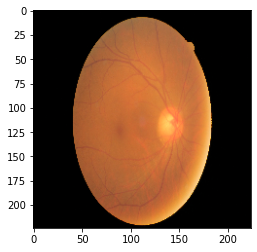

In [47]:
images,cls = next(test_set)
plt.imshow(images[0])

0 Actual: glaucoma
File: glaucoma\Glaucoma_061.png
1predicted: normal
[1. 0.]
[0.024408936500549316, 0.9755910634994507]
1 Actual: normal
File: glaucoma\Glaucoma_062.png
1predicted: normal
[0. 1.]
[0.011544765904545784, 0.9884551763534546]
0 Actual: glaucoma
File: glaucoma\Glaucoma_063.png
1predicted: normal
[1. 0.]
[0.0016614175401628017, 0.9983385801315308]
0 Actual: glaucoma
File: glaucoma\Glaucoma_064.png
1predicted: normal
[1. 0.]
[0.0013201436959207058, 0.9986798167228699]
0 Actual: glaucoma
File: glaucoma\Glaucoma_065.png
1predicted: normal
[1. 0.]
[1.6366839190595783e-05, 0.9999836683273315]
0 Actual: glaucoma
File: glaucoma\Glaucoma_066.png
1predicted: normal
[1. 0.]
[1.2497528132371372e-06, 0.9999988079071045]
1 Actual: normal
File: glaucoma\Glaucoma_067.png
1predicted: normal
[0. 1.]
[0.18379011750221252, 0.8162099123001099]
1 Actual: normal
File: glaucoma\Glaucoma_068.png
1predicted: normal
[0. 1.]
[3.6091059882892296e-05, 0.9999638795852661]
0 Actual: glaucoma
File: glauco

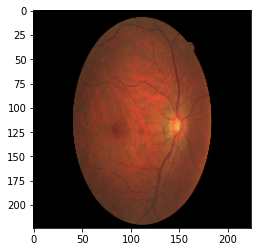

In [61]:
images,cls = next(test_set)
filename=test_set.filenames

#plt.imshow(images[0])
#print(cls[0])
#print(filename[0])
i=0
actual=[]
predicted=[]
for cl in cls:
    c=cl.tolist()
    max_value = max(c)
    max_index = c.index(max_value)
    print(str(max_index) + " Actual: " + cat[max_index])
    print("File: "  + filename[i])
    plt.imshow(images[i])
    actual.append(cat[max_index])
    
    pd=pred[i].tolist()
    m_value = max(pd)
    #print(max_value)
    m_index = pd.index(m_value)
    #print(max_index)
    print(str(m_index) + "predicted: " + cat[m_index])
    predicted.append(cat[m_index])
    print(cl)
    print(pd)
    #print("file" + filename[i])
    #plt.savefig('D:\\CatractImagesMobileNet\cataract\Predicted\Actual-' + str(cat[max_index]) + ' Predicted-' + str(cat[m_index])+ '-' +'Detected Image Name-' + str(filename[i]).split('\\')[1] + str(i) +'.png')
    
    i=i+1
    
#print(pd)
#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()


In [119]:
len(actual)

40

In [145]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

    cataract       0.12      0.10      0.11        20
     glacuma       0.44      0.60      0.51        40
      normal       0.50      0.20      0.29        20

    accuracy                           0.38        80
   macro avg       0.35      0.30      0.30        80
weighted avg       0.37      0.38      0.35        80



In [208]:
#for file in test_set.filenames:
 #   print(file)

In [210]:


#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()

In [20]:
#for t in test_set:
 #   print(t)

In [24]:
actual=[]
img=1
row=1
for i in range(int(imageCount/8)):
    images,cls = next(test_set)
    print(len(cls))
    #print("In in first batch at 3")
    j=0
    for c in cls:
        cl=c.tolist()
        m_value = max(cl)
        m_index = cl.index(m_value)
        print("Index" + str(m_index))
        print("Actual: " + cat[m_index])
        print("class", cl)
        actual.append(cat[m_index])
        worksheet1.write(row, 1, str(cat[m_index]))
        
        #plt.imshow(images[j])
        #plt.savefig("D:\\ImagesForCocoAssesment\\MobileNet\\TagsForInputImagesGeneratedByProgram\\" + str(img) + "-" + str(cat[m_index]) + ".png")
        img=img+1
        j=j+1
        row=row+1
    i=i+1
 


32
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.

In [72]:
workbook.close()    
    

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\xlsxwriter\workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [227]:
actual

['cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'c

              precision    recall  f1-score   support

    cataract       1.00      1.00      1.00         2
      normal       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



32